In [2]:
using Plots 

In [3]:
#Input data
x = [0 2 -1;-2 4 -1;4 1 -1;1 6 -1;2 4 -1;6 2 -1];
# Output label
y = [-1 -1 -1 1 1 1];

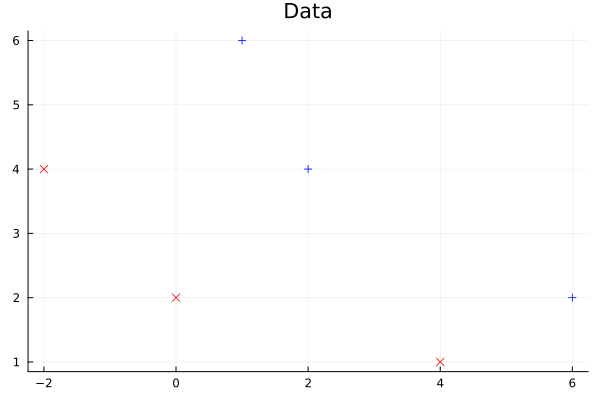

In [4]:
scatter(title="Data",legend=false);
class1 = x[(1:length(y))'[y.==-1],:];
class2 = x[(1:length(y))'[y.== 1],:];
scatter!(class1[:,1],class1[:,2],markershape=:x,c=:red)
scatter!(class2[:,1],class2[:,2],markershape=:+,c=:blue)

In [5]:
function SVM(x,y,lr=1,epoch=1000)
    w = zeros(size(x,2))
    out = []
    for e in 1:epoch
        for (i,row) in enumerate(eachrow(x))
            val = row' * w
            if y[i] * val < 1
                w = w .+ lr * ((y[i] * row) .- (2*(1/epoch)*w))
            else
                w = w .+ lr * (-2*(1/epoch)*w)
            end
        end
    end
    for (i,row) in enumerate(eachrow(x))
        append!(out,row' * w)
    end
    return w,out
end

SVM (generic function with 3 methods)

In [6]:
w,out = SVM(x,y)

([2.43389473780759, 4.2245912971172155, 17.20445998087137], Any[-8.755277386636939, -5.173884268017687, -3.244289732523793, 10.576982539639516, 4.5616946832126715, 5.848091040208601])

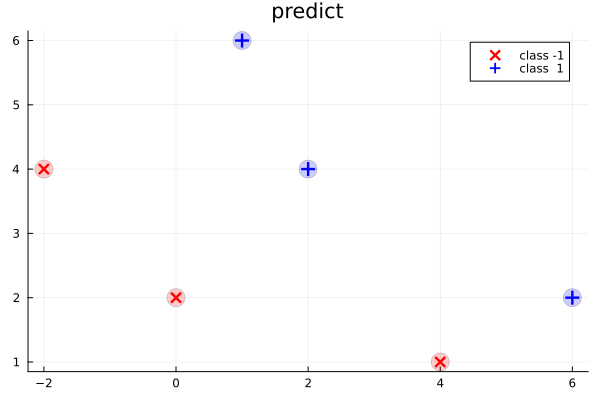

In [23]:
scatter(title="predict");
class1 = x[(1:length(y))'[y.==-1],:];
class2 = x[(1:length(y))'[y.== 1],:];
scatter!(class1[:,1],class1[:,2],markershape=:x,c=:red,markersize=5,markerstrokewidth=3,label="class -1")
scatter!(class2[:,1],class2[:,2],markershape=:+,c=:blue,markersize=7,markerstrokewidth=3,label="class  1")
color_filter = a -> a <= 0 ? :red : :blue
color = color_filter.(out)
scatter!(x[:,1],x[:,2],c=color,markeralpha=0.2,markersize=10,label=false)



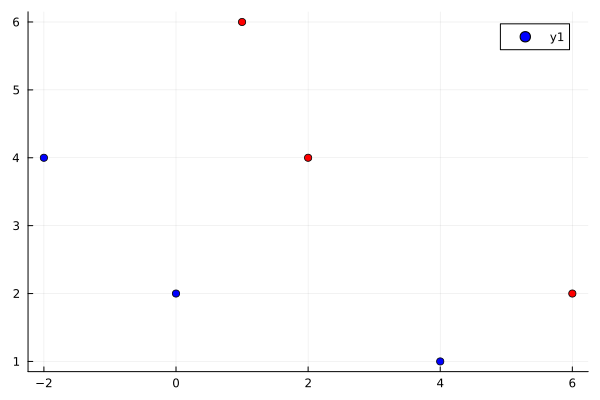

In [15]:

scatter(x[:,1],x[:,2],)

6-element Vector{Symbol}:
 :blue
 :blue
 :blue
 :red
 :red
 :red